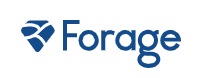

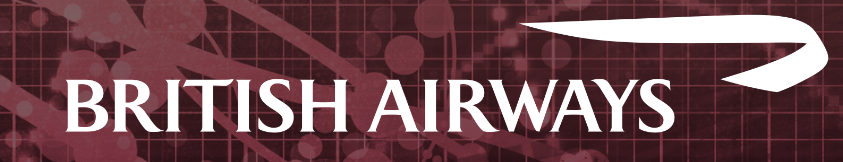

# Task Two OF Forge British Airways Data Science Internship
* The Data was provided by Forge

In [50]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Load the dataset
data = pd.read_csv('/content/customer_booking (1).csv', encoding='latin1')
data.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete,Unnamed: 14,Predict_customer_booking
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0,NaN,NaN
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0,NaN,NaN
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0,NaN,NaN
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0,NaN,NaN
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0,NaN,NaN


In [51]:
data.drop(columns=['Unnamed: 14'], inplace=True)
data.drop(columns=['Predict_customer_booking'], inplace=True)



In [52]:
data["flight_day"].unique()

array(['Sat', 'Wed', 'Thu', 'Mon', 'Sun', 'Tue', 'Fri'], dtype=object)

In [53]:
mapping = {
    "Mon": 1,
    "Tue": 2,
    "Wed": 3,
    "Thu": 4,
    "Fri": 5,
    "Sat": 6,
    "Sun": 7,
}

data["flight_day"] = data["flight_day"].map(mapping)

In [54]:
data["flight_day"].unique()

array([6, 3, 4, 1, 7, 2, 5])

In [55]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   num_passengers         50000 non-null  int64  
 1   sales_channel          50000 non-null  object 
 2   trip_type              50000 non-null  object 
 3   purchase_lead          50000 non-null  int64  
 4   length_of_stay         50000 non-null  int64  
 5   flight_hour            50000 non-null  int64  
 6   flight_day             50000 non-null  int64  
 7   route                  50000 non-null  object 
 8   booking_origin         50000 non-null  object 
 9   wants_extra_baggage    50000 non-null  int64  
 10  wants_preferred_seat   50000 non-null  int64  
 11  wants_in_flight_meals  50000 non-null  int64  
 12  flight_duration        50000 non-null  float64
 13  booking_complete       50000 non-null  int64  
dtypes: float64(1), int64(9), object(4)
memory usage: 5.3+ 

# I used the Scikit-Learn Random Forest Classifier as instructed by a British Airways Data Scientist.

In [56]:

features = ['num_passengers', 'sales_channel', 'trip_type', 'purchase_lead', 'length_of_stay',
            'flight_hour', 'flight_day', 'route', 'booking_origin', 'wants_extra_baggage',
            'wants_preferred_seat', 'wants_in_flight_meals', 'flight_duration']

X = data[features]
y = data['booking_complete']


In [57]:
X = pd.get_dummies(X, columns=['sales_channel', 'trip_type', 'flight_day', 'route', 'booking_origin'])


In [58]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [59]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [60]:
# Make predictions on the test set
y_pred = rf_model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Generate classification report
class_report = classification_report(y_test, y_pred)
print('Classification Report:')
print(class_report)


Accuracy: 0.85
Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.98      0.92      8520
           1       0.53      0.13      0.20      1480

    accuracy                           0.85     10000
   macro avg       0.70      0.55      0.56     10000
weighted avg       0.82      0.85      0.81     10000



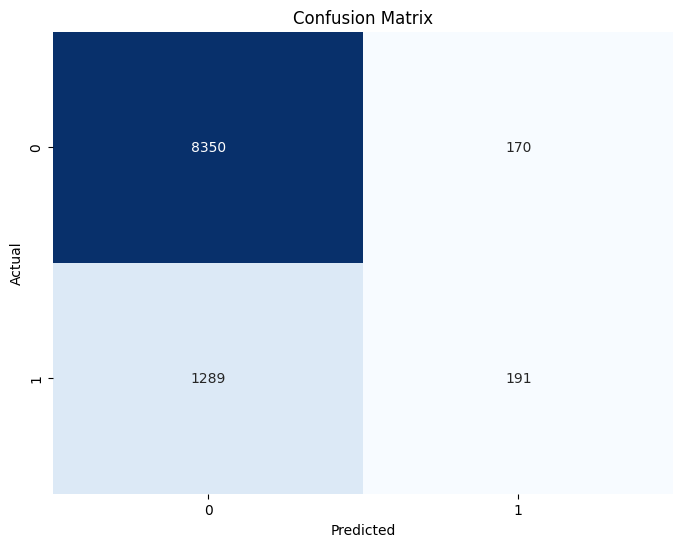

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


In summary, the predictive model yielded an accuracy of 0.85 on the test set, indicating a commendable level of overall correctness in its predictions. The accompanying classification report provides a more detailed insight into the model's performance. For class 0, representing customers who did not make a booking, the precision is 0.87, suggesting that when the model predicts a customer will not make a booking, it is accurate 87% of the time. The recall for class 0 is 0.98, indicating that the model effectively identifies a high proportion of actual non-booking cases.

Conversely, for class 1, which represents customers who made a booking, the precision is 0.53, meaning the model's prediction of a booking is accurate approximately 53% of the time. The recall for class 1 is 0.13, implying that the model's ability to correctly identify actual booking cases is relatively low. This asymmetry between precision and recall suggests that the model may have difficulty accurately predicting booking occurrences.

The macro average and weighted average metrics offer an overview of the model's performance across both classes. The macro average F1-score is 0.56, indicating a balanced compromise between precision and recall across classes. The weighted average F1-score is 0.81, which considers class imbalance and overall performance.

In conclusion, while the model demonstrates an accuracy of 0.85, the detailed analysis provided by the classification report underscores the model's strengths and areas for improvement in predicting customer bookings. Further refinements could be explored to enhance its precision and recall for both classes, ultimately contributing to more effective predictions and decision-making.





